In [4]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
import statsmodels.api as sm
get_ipython().run_line_magic('matplotlib', 'inline')
import random as rnd
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from pandas import Series,DataFrame
sns.set_style('whitegrid')
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)



pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.1.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 61 Stepping 4, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.23.4
pytest: 4.0.2
pip: 18.1
setuptools: 40.6.3
Cython: 0.29.2
numpy: 1.15.4
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 7.2.0
sphinx: 1.8.2
patsy: 0.5.1
dateutil: 2.7.5
pytz: 2018.7
blosc: None
bottleneck: 1.2.1
tables: 3.4.4
numexpr: 2.6.8
feather: None
matplotlib: 3.0.2
openpyxl: 2.5.12
xlrd: 1.2.0
xlwt: 1.3.0
xlsxwriter: 1.1.2
lxml: 4.2.5
bs4: 4.6.3
html5lib: 1.0.1
sqlalchemy: 1.2.15
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


In [5]:
titanic = pd.read_csv('data/Simon-005986014-1.csv')
test = pd.read_csv('data/Simon-005986014-2.csv')
combine = [titanic, test]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Torber, Mr. Ernst William",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
gender = pd.get_dummies(titanic['Sex'])
gender.columns = ['Female','Male'] # Clean up format to adhere to consistency while remaining descriptive
gender.head(10)

,Female,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [8]:
#wealth_class = pd.get_dummies(titanic['Pclass'])
#wealth_class.columns = ['Upper_Class','Middle_Class','Lower_Class']
#wealth_class.head(10)

In [9]:
embarked = pd.get_dummies(titanic['Embarked'])
embarked.columns = ['Cherbourg','Queenstown','Southampton']
embarked.head(10)

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [10]:
#del titanic['Cabin']
del titanic['Ticket']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [11]:
titanic['Survived'].replace('No', 0, inplace=True)
titanic['Survived'].replace('Yes', 1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [12]:
# NOT NEEDED
titanic.iloc[7,3] # how to select certain cells in data

'Palsson, Master. Gosta Leonard'

In [13]:
titanic['Sex'].replace('male', 'M', inplace=True)
titanic['Sex'].replace('female', 'F', inplace=True)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,8.0500,NaN,S


In [14]:
titanic['Pclass'].replace(1, 'upper', inplace=True)
titanic['Pclass'].replace(2, 'middle', inplace=True)
titanic['Pclass'].replace(3, 'lower', inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,lower,"Braund, Mr. Owen Harris",M,22.0,1,0,7.2500,NaN,S
1,2,1,upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,71.2833,C85,C
2,3,1,lower,"Heikkinen, Miss. Laina",F,26.0,0,0,7.9250,NaN,S
3,4,1,upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,53.1000,C123,S
4,5,0,lower,"Allen, Mr. William Henry",M,35.0,0,0,8.0500,NaN,S


In [15]:
titanic['Embarked'].replace('S', 'Southampton', inplace=True)
titanic['Embarked'].replace('C', 'Cherbourg', inplace=True)
titanic['Embarked'].replace('Q', 'Queenstown', inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,lower,"Braund, Mr. Owen Harris",M,22.0,1,0,7.2500,NaN,Southampton
1,2,1,upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,71.2833,C85,Cherbourg
2,3,1,lower,"Heikkinen, Miss. Laina",F,26.0,0,0,7.9250,NaN,Southampton
3,4,1,upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,53.1000,C123,Southampton
4,5,0,lower,"Allen, Mr. William Henry",M,35.0,0,0,8.0500,NaN,Southampton


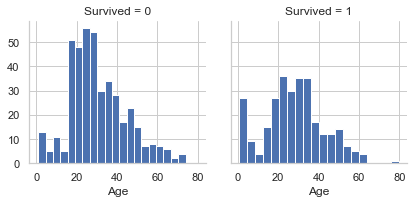

In [16]:
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

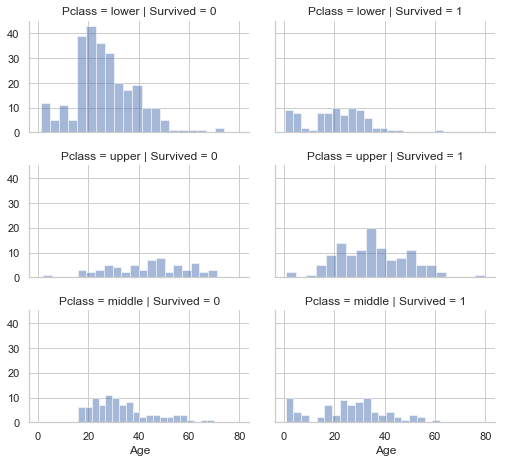

In [17]:

grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\natha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


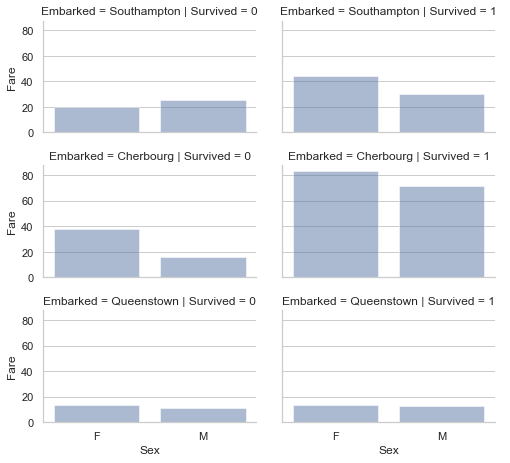

In [18]:

grid = sns.FacetGrid(titanic, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

C:\Users\natha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\natha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\natha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\natha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis)

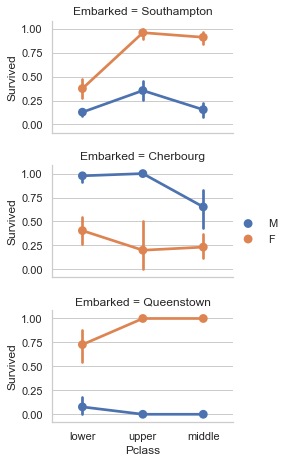

In [19]:

grid = sns.FacetGrid(titanic, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

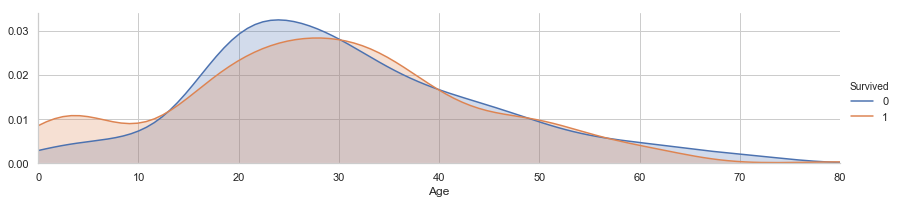

In [20]:
facet = sns.FacetGrid(titanic, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()

C:\Users\natha\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[Text(0, 0, 'With Family'), Text(0, 0, 'Alone')]

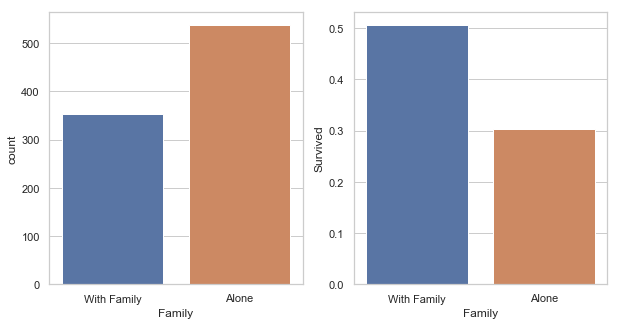

In [21]:

titanic['Family'] =  titanic["Parch"] + titanic["SibSp"]
titanic['Family'].loc[titanic['Family'] > 0] = 1
titanic['Family'].loc[titanic['Family'] == 0] = 0

test['Family'] =  test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0



fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

sns.countplot(x='Family', data=titanic, order=[1,0], ax=axis1)

family_perc = titanic[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

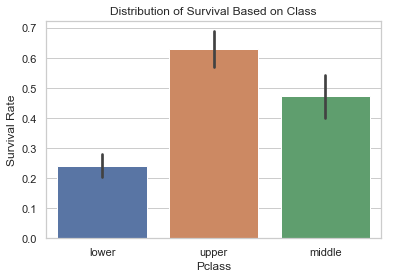

In [22]:
sns.barplot(x="Pclass", y="Survived", data=titanic)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = titanic[titanic.Pclass == 1]["Survived"].sum()
total_survived_two = titanic[titanic.Pclass == 2]["Survived"].sum()
total_survived_three = titanic[titanic.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three



Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

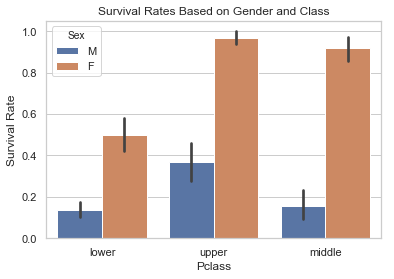

In [23]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")
#help(sns.barplot)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

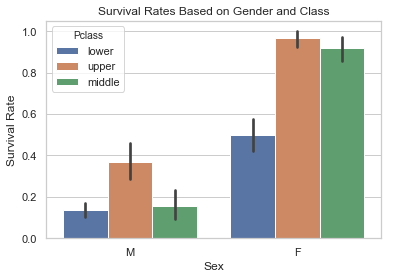

In [24]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

C:\Users\natha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\natha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


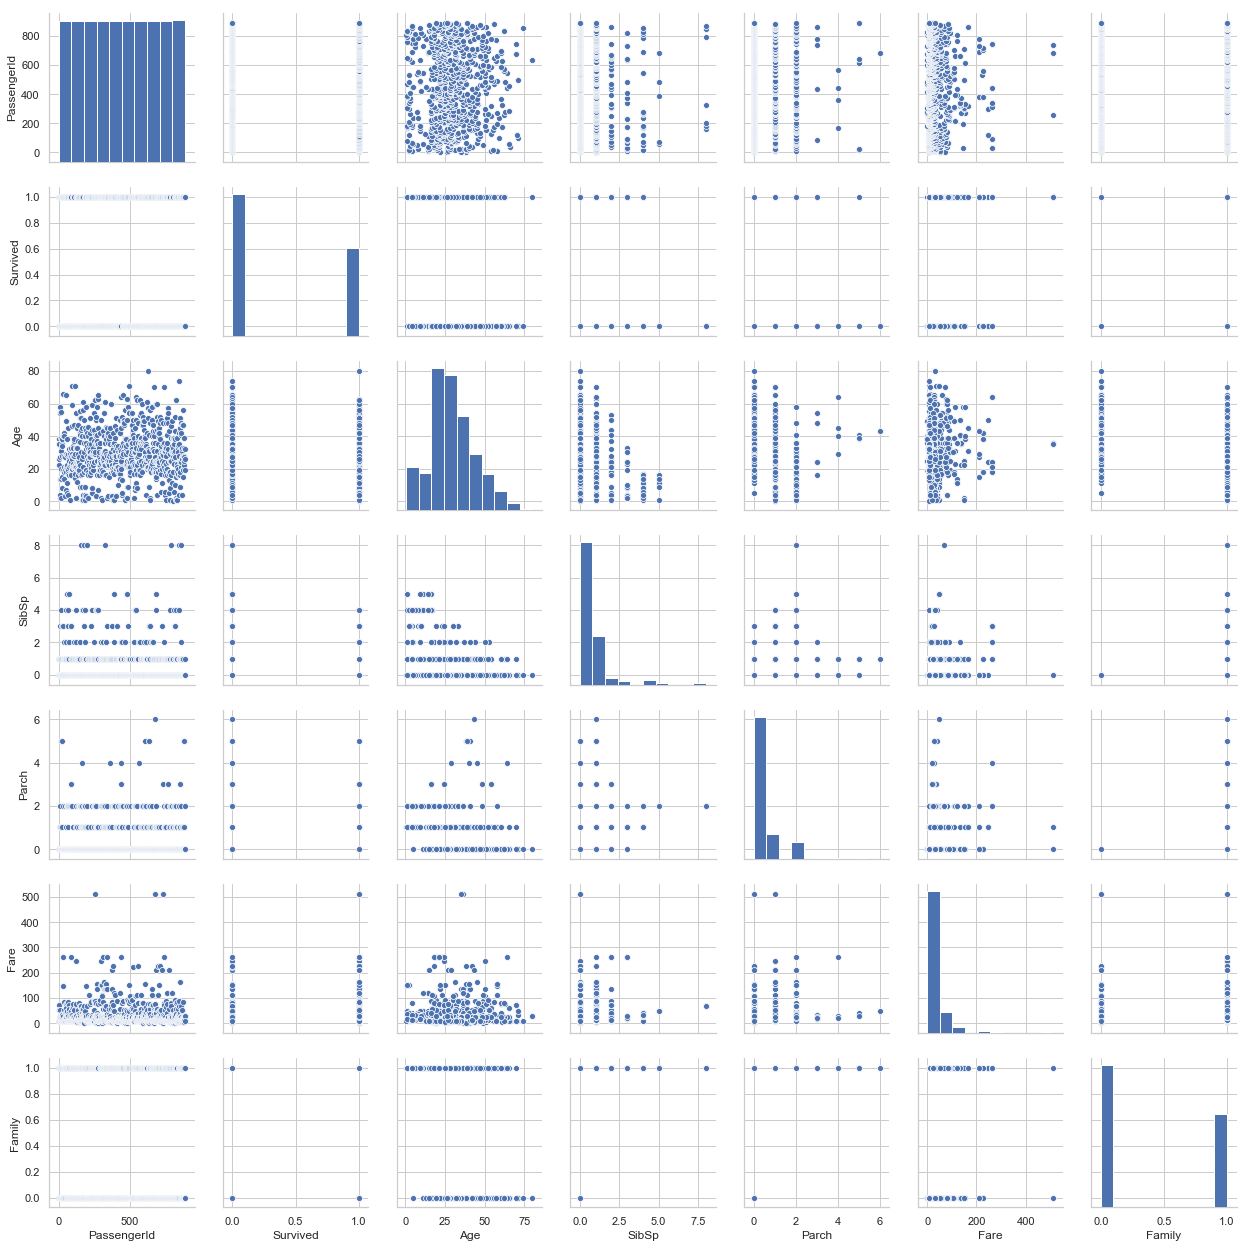

In [25]:
sns.pairplot(titanic)

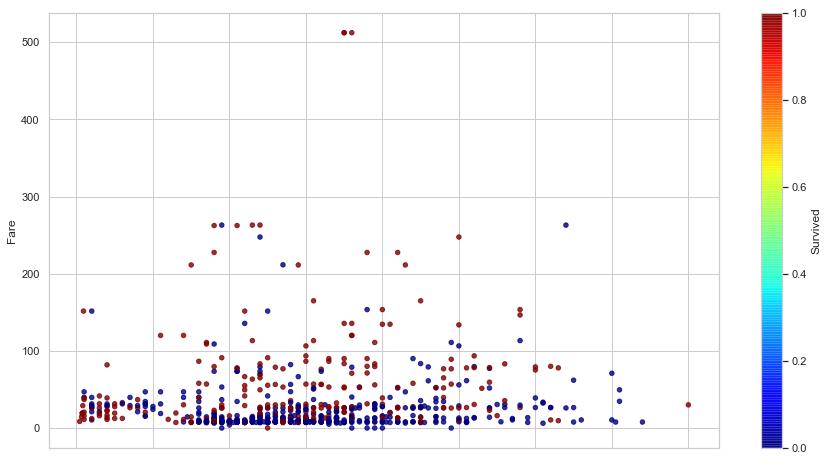

In [26]:
#Age versus Fare
titanic.plot.scatter('Age','Fare',c='Survived',colormap='jet',alpha=0.8,figsize=(15,8))

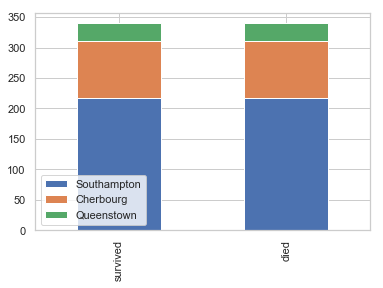

In [27]:
survived_embarkment  = titanic[titanic['Survived']==1]['Embarked'].value_counts()
died_embarkment = titanic[titanic['Survived']==1]['Embarked'].value_counts()
df = pd.DataFrame([survived_embarkment,died_embarkment])
df.index=['survived','died']
df.plot(kind='bar',stacked=True)

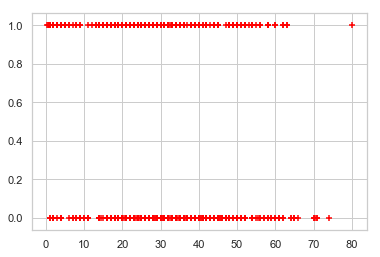

In [28]:
plt.scatter(titanic.Age,titanic.Survived,marker='+',color='red')

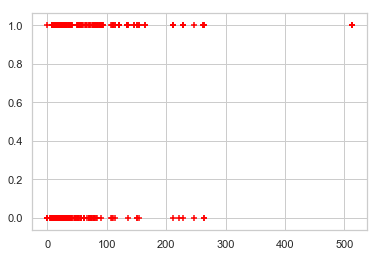

In [29]:
plt.scatter(titanic.Fare,titanic.Survived,marker='+',color='red')